In [43]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [44]:

df = pd.read_csv("Salary_Data.csv")
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [45]:
x = df.drop(['Salary'], axis='columns')
y = df["Salary"]

x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [46]:
# splitting dataset

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
x_test

,YearsExperience
27,9.6
24,8.7
8,3.2
16,5.1
20,6.8
19,6.0
0,1.1
28,10.3
12,4.0


In [47]:
y_test

27    112635.0
24    109431.0
8      64445.0
16     66029.0
20     91738.0
19     93940.0
0      39343.0
28    122391.0
12     56957.0
Name: Salary, dtype: float64

In [49]:
# training the model

model = KNeighborsRegressor(n_neighbors = 3)  # n_neighbors = K
model.fit(x_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [50]:
y_pred = model.predict(x_test)
y_pred

array([114807.66666667, 106898.66666667,  57079.        ,  70712.33333333,
        93646.        ,  77463.        ,  42487.        , 114807.66666667,
        58697.66666667])

In [51]:
y_test

27    112635.0
24    109431.0
8      64445.0
16     66029.0
20     91738.0
19     93940.0
0      39343.0
28    122391.0
12     56957.0
Name: Salary, dtype: float64

In [52]:
score = model.score(x_test,y_test)
score

0.9337101265487172

In [53]:
# making predictions

i = model.predict([[9.6]])
i

c:\harmeet\ML_Oct_2025\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([114807.66666667])

In [55]:

df = pd.read_csv("Salary_Data2.csv")
df.head(10)

,YearsExperience,Age,Salary
0,1.1,40,39343
1,1.3,44,46205
2,1.5,23,37731
3,2.0,22,43525
4,2.2,33,39891
5,2.9,46,56642
6,3.0,24,60150
7,3.2,46,54445
8,3.2,24,64445
9,3.7,65,57189


In [56]:
x = df.drop(['Salary'], axis='columns')
y = df["Salary"]

x.head()

,YearsExperience,Age
0,1.1,40
1,1.3,44
2,1.5,23
3,2.0,22
4,2.2,33


In [57]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
x_test

,YearsExperience,Age
22,7.9,54
19,6.0,44
15,4.9,57
16,5.1,56
24,8.7,66
21,7.1,45
27,9.6,36
3,2.0,22
11,4.0,29


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [67]:
X_train_scaled

array([[-0.6039288 ,  0.5247566 ],
       [-0.67266866, -0.99047808],
       [-0.70703859,  0.5247566 ],
       [-1.25695749,  0.38700799],
       [-1.32569736,  0.11151078],
       [-1.18821763, -1.05935239],
       [-0.32896934, -1.12822669],
       [ 1.11456778,  1.97111698],
       [-0.15711969, -1.05935239],
       [ 0.32405935, -0.16398644],
       [-0.43207914,  1.83336837],
       [-0.6039288 , -0.99047808],
       [ 1.83633634,  1.14462534],
       [-0.29459941, -0.30173505],
       [-0.94762811, -0.37060935],
       [ 0.63338874,  1.83336837],
       [-0.36333928, -0.30173505],
       [ 0.11783977, -1.05935239],
       [ 1.56137689,  0.4558823 ],
       [ 1.38952723, -0.30173505],
       [ 1.9050762 , -1.05935239]])

In [59]:
# training the model

model = KNeighborsRegressor(n_neighbors = 3)  # n_neighbors = K
model.fit(X_train_scaled,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [60]:
y_pred = model.predict(X_test_scaled)
y_pred

array([110366.        ,  64296.33333333,  67790.66666667,  67790.66666667,
       109313.66666667, 101304.66666667, 114807.66666667,  54108.66666667,
        61581.33333333])

In [61]:
y_test

22    101302
19     93940
15     67938
16     66029
24    109431
21     98273
27    112635
3      43525
11     55794
Name: Salary, dtype: int64

In [62]:
score = model.score(X_test_scaled,y_test)
score

0.7787450843102163

KNN with Optimal "K"

In [66]:
K_Values = [2,3,4,5,6,7,8,9,11,12,13,14,15, 16,17,18,19,20]
ACCURACIES = []


for k in K_Values:
    model = KNeighborsRegressor(n_neighbors = k)  # n_neighbors = K
    model.fit(X_train_scaled,y_train)
    acc = model.score(X_test_scaled,y_test)
    ACCURACIES.append(acc)

print(ACCURACIES)

[0.7720021034128917, 0.7787450843102163, 0.7501544721623963, 0.7423159864550641, 0.8097448456779387, 0.7976693656273512, 0.7478686905118705, 0.6448710823765667, 0.5550163252935433, 0.4825405774944608, 0.48321871002708194, 0.41429680447377115, 0.34016290774280633, 0.2525899875201504, 0.1569119760069967, 0.0762392373223647, 0.03715713785637986, -0.0778877798187021]


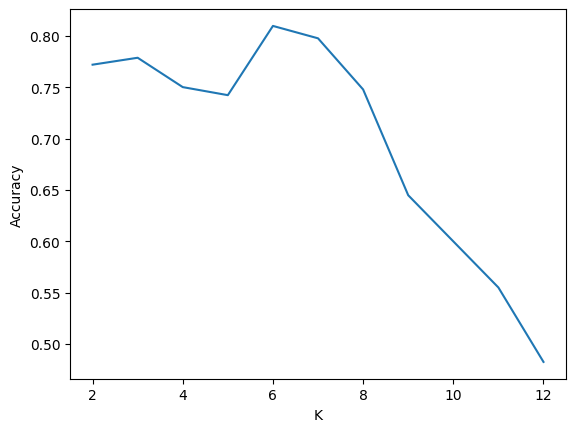

In [64]:
# plotting

plt.plot(K_Values,ACCURACIES)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()